In [2]:
#Код для генерации диаграмм
import base64
import io, requests
from IPython.display import Image, display
from PIL import Image as im
import matplotlib.pyplot as plt

def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.urlsafe_b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    img = im.open(io.BytesIO(requests.get('https://mermaid.ink/img/' + base64_string).content))
    plt.imshow(img)
    plt.axis('off') # allow to hide axis
    plt.savefig('image.png', dpi=1200)


## Прямое наследование: Cylinder как подкласс Circle.

Такой подход можно использовать, если мы считаем, что цилиндр – это специализированная версия круга, например, при моделировании объектов, где для цилиндра все особенности круга важны.  
В такой концепции считается что Цилиндр является Кругом. Отношение «is a»

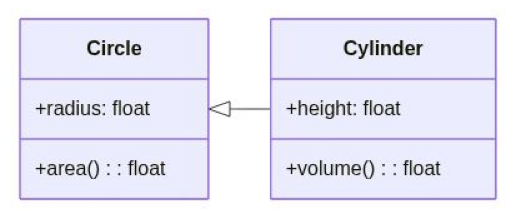

In [3]:
mm('''
classDiagram
direction LR
    class Circle {
        +radius: float
        +area(): float
    }
    class Cylinder {
        +height: float
        +volume(): float
    }
    Circle <|-- Cylinder''')

## Общее базовое тело

Может быть Круг и Цилиндр не являются наследниками друг друга, а просто родственниками? Такой вариант полезен, если необходимо обрабатывать круги и цилиндры как объекты одного семейства.

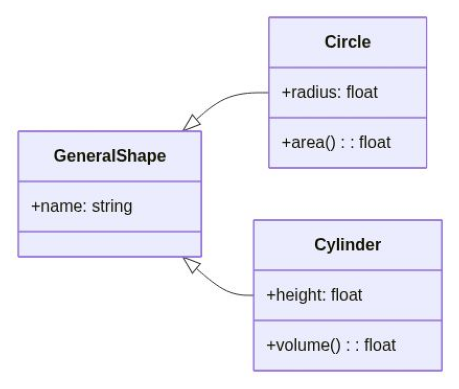

In [4]:
mm('''
classDiagram
    direction LR
    class GeneralShape {
        +name: string
    }
    class Circle {
        +radius: float
        +area(): float
    }
    class Cylinder {
        +height: float
        +volume(): float
    }
    GeneralShape <|-- Circle
    GeneralShape <|-- Cylinder''')


## Композиция: Cylinder содержит Circle

Можно использовать логику круга внутри цилиндра и экономить на повторяющемся коде. Такой подход верно отражает структуру объектов в реальном мире: цилиндр содержит круг.

У переменной base тип GeneralShape, то есть Cylinder может содержать не только Круг, но и другие дочерние классы GeneralShape. 

Например мы можем создать Цилиндр с основанием треугольника или квадрата, хотя с точки зрения геометрии это будет уже не цилиндр, но принцип вычисления объёма останется тот же.

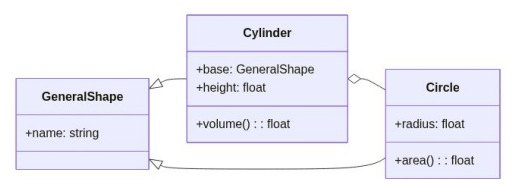

In [5]:
mm('''
classDiagram
    direction LR
    class Circle {
        +radius: float
        +area(): float
    }
    class Cylinder {
        +base: GeneralShape
        +height: float
        +volume(): float
    }
    class GeneralShape {
        +name: string
    }
    Cylinder o-- Circle
    GeneralShape <|-- Circle
    GeneralShape <|-- Cylinder
''')

## Интерфейс: ICircularShape реализуется и Circle, и Cylinder

Если у классов должны быть одинаковые свойства, то мы можем присвоить их с помощью интерфейсов.

В Python интерфейс создается просто как абстрактный класс

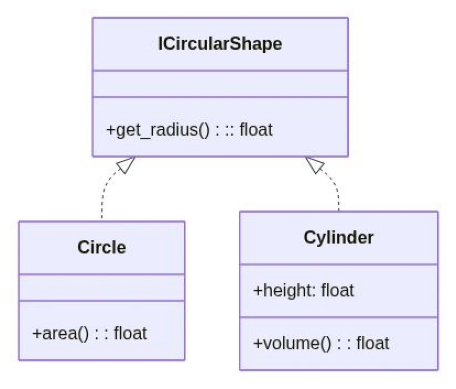

In [6]:
mm('''
classDiagram
    class ICircularShape {
        +get_radius():: float
    }
    class Circle {
        +area(): float
    }
    class Cylinder {
        +height: float
        +volume(): float
    }
    ICircularShape <|.. Circle
    ICircularShape <|.. Cylinder
''')

Некоторые из связей в UML-диаграмме классов:

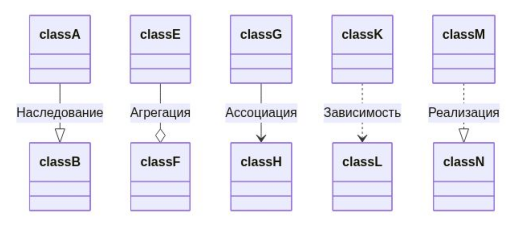

In [7]:
mm('''
classDiagram
classA --|> classB : Наследование
classE --o classF : Агрегация
classG --> classH : Ассоциация
classK ..> classL : Зависимость
classM ..|> classN : Реализация''')